### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
warnings.simplefilter("ignore")

# np.random.seed(1)
# random.seed(1)

import sys
sys.path.append("..")
sys.path.append("../shared")

from wednesdaySPEED import simulation

import numba
print(numba.__version__)

import itertools
import operator
import scipy as sc
from analytic_tools import *
import statsmodels.api as sm
import stochastic

0.53.1


### Implemented periodic boundaries for the CA

In [3]:
def cluster_info(arr):
    """ number of clusters (nonzero fields separated by 0s) in array
        and size of cluster
    """
    data = []
    k2coord = {}
    k = 0

    # =========================================================== #
    tmp_left = 0
    tmp_right = len(arr)-1
    
    if arr[0] != 0 and arr[-1] != 0: # periodic boundaries
        data.append(0)
        k2coord[k] = []
        
        for i in range(0,len(arr)):
            if arr[i] == 0:
                tmp_left = i
                break
            else:
                data[-1] += 1
                k2coord[k].append(i)
                
        if tmp_left != 0:
            for i in range(len(arr)-1,-1,-1):
                if arr[i] == 0:
                    tmp_right = i+1
                    break
                else:
                    data[-1] += 1
                    k2coord[k].append(i)

        for i in range(tmp_left, tmp_right):
            if arr[i] == 0 and arr[i+1] != 0:
                data.append(0)
                k += 1
                k2coord[k] = []
            if arr[i] != 0:
                data[-1] += 1
                k2coord[k].append(i)
    # =========================================================== #              
    else:
        if arr[0] != 0: # left boundary
            data.append(0) # we will increment later in loop  
            k2coord[k] = []
        else:
            k=-1

        for i in range(0,len(arr)-1):
            if arr[i] == 0 and arr[i+1] != 0:
                data.append(0)
                k += 1
                k2coord[k] = []
            if arr[i] != 0:
                data[-1] += 1
                k2coord[k].append(i)

        if arr[-1] != 0:
            if data:  # if array is not empty
                data[-1] += 1  # right boundary
                k2coord[k].append(len(arr)-1)
            else:
                data.append(1)  
                k2coord[k] = [len(arr)-1]
        
    Ncl = len(data)  # number of clusters
    Nk = data  # Nk[k] = size of cluster k
    coord2k = {e:k for k,v in k2coord.items() for e in v}
    return Ncl, Nk, k2coord, coord2k

### Analyzing the distribution of cluster size (active agents)
Vary the number of agents $N_1$ in the system. For a larger $N_1$, large clusters can form. Also the simulation is very sensitive to the parameter $p_h$. Furthermore, a power law is fitted to the distribution loglog plot.

#### N1 = 100

Text(0.5, 1.0, 'N1 = 100')

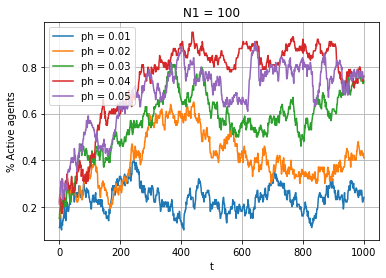

In [4]:
ph_vals = 5
ph_range = np.linspace(0.01, 0.05, ph_vals)
# ph = 0.0485
N1 = 100

fig, ax = plt.subplots() 

for val in ph_range:
    G,P,N,S,X,D,T,U,C, initial_account_balance = simulation(trigger = False, bound = True, pd = 0.05, pe = 0.01,
                    ph = val, pa = 0.2, N0 = 1000, N1 = N1, A = 3, a=2*3, h=1, 
                    pi1 = 0.5, pi2 = 0.3, pi3 = 0.2)
    ax.plot(np.count_nonzero(G, axis=1)/N1, label = 'ph = ' + str(val))
ax.legend()
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('% Active agents')
ax.set_title('N1 = 100')

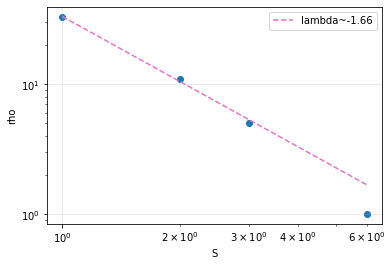

In [5]:
def power_law(x, a, b):
    return a * x ** (-b)

clusters = [[i for i,value in it] for key,it in itertools.groupby(enumerate(G[-1,:]), 
                                                                  key=operator.itemgetter(1)) if key != 0]
cluster_size = []
for i in range(len(clusters)):
    cluster_size.append(len(clusters[i]))
unique, counts = np.unique(cluster_size, return_counts=True)
popt, pcov = sc.optimize.curve_fit(power_law, unique, counts)

fig, ax = plt.subplots() 
ax.scatter(unique, counts)

power_law = popt[0]*unique**(-popt[1])
ax.plot(unique, power_law, color='tab:pink', label=f'lambda~{-1 * popt[1]:.2f}', ls='--')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('S')
ax.set_ylabel('rho')
ax.grid(alpha=0.3)
ax.legend()

#### N1 = 1000

Text(0.5, 1.0, 'N1 = 1000')

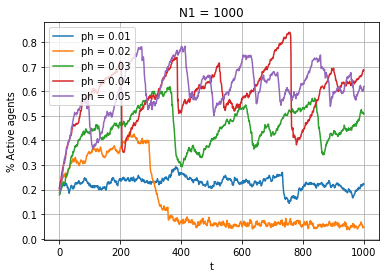

In [6]:
ph_vals = 5
ph_range = np.linspace(0.01, 0.05, ph_vals)
# ph = 0.0485
N1 = 1000

fig, ax = plt.subplots() 

for val in ph_range:
    G,P,N,S,X,D,T,U,C, initial_account_balance = simulation(trigger = False, bound = True, pd = 0.05, pe = 0.01,
                    ph = val, pa = 0.2, N0 = 1000, N1 = N1, A = 3, a=2*3, h=1, 
                    pi1 = 0.5, pi2 = 0.3, pi3 = 0.2)
    ax.plot(np.count_nonzero(G, axis=1)/N1, label = 'ph = ' + str(val))
ax.legend()
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('% Active agents')
ax.set_title('N1 = 1000')

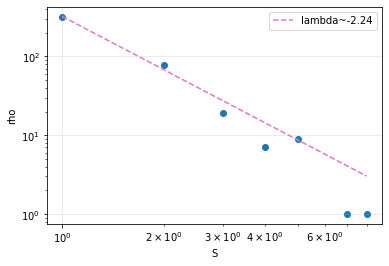

In [7]:
def power_law(x, a, b):
    return a * x ** (-b)

clusters = [[i for i,value in it] for key,it in itertools.groupby(enumerate(G[-1,:]), 
                                                                  key=operator.itemgetter(1)) if key != 0]
cluster_size = []
for i in range(len(clusters)):
    cluster_size.append(len(clusters[i]))
unique, counts = np.unique(cluster_size, return_counts=True)
popt, pcov = sc.optimize.curve_fit(power_law, unique, counts)

fig, ax = plt.subplots() 
ax.scatter(unique, counts)

power_law = popt[0]*unique**(-popt[1])
ax.plot(unique, power_law, color='tab:pink', label=f'lambda~{-1 * popt[1]:.2f}', ls='--')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('S')
ax.set_ylabel('rho')
ax.grid(alpha=0.3)
ax.legend()

#### N1 = 10000

Text(0.5, 1.0, 'N1 = 10000')

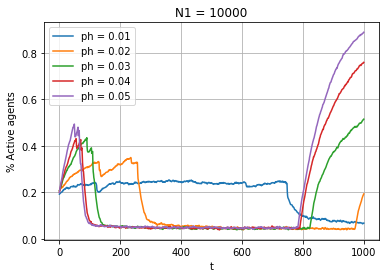

In [8]:
ph_vals = 5
ph_range = np.linspace(0.01, 0.05, ph_vals)
# ph = 0.0485
N1 = 10000

fig, ax = plt.subplots() 

for val in ph_range:
    G,P,N,S,X,D,T,U,C, initial_account_balance = simulation(trigger = False, bound = True, pd = 0.05, pe = 0.01,
                    ph = val, pa = 0.2, N0 = 1000, N1 = N1, A = 3, a=2*3, h=1, 
                    pi1 = 0.5, pi2 = 0.3, pi3 = 0.2)
    ax.plot(np.count_nonzero(G, axis=1)/N1, label = 'ph = ' + str(val))
ax.legend()
ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('% Active agents')
ax.set_title('N1 = 10000')

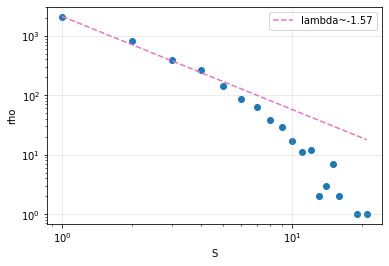

In [9]:
def power_law(x, a, b):
    return a * x ** (-b)

clusters = [[i for i,value in it] for key,it in itertools.groupby(enumerate(G[-1,:]), 
                                                                  key=operator.itemgetter(1)) if key != 0]
cluster_size = []
for i in range(len(clusters)):
    cluster_size.append(len(clusters[i]))
unique, counts = np.unique(cluster_size, return_counts=True)
popt, pcov = sc.optimize.curve_fit(power_law, unique, counts)

fig, ax = plt.subplots() 
ax.scatter(unique, counts)

power_law = popt[0]*unique**(-popt[1])
ax.plot(unique, power_law, color='tab:pink', label=f'lambda~{-1 * popt[1]:.2f}', ls='--')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('S')
ax.set_ylabel('rho')
ax.grid(alpha=0.3)
ax.legend()

## Heat capacity diagram analysis from canessa2000

In [11]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def visualiseNICE(G, P, N, S, X, D, T, U, C):
    fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(
        ncols=1, nrows=8, figsize=(12,12), sharex=True, gridspec_kw = 
        {'wspace':0, 'hspace':0.05, 'height_ratios':[2,2,1,1,1,1,1,1]}
    )
    im1 = ax1.imshow(G.T, cmap="bone", interpolation="None", aspect="auto")
    im4 = ax4.imshow(P.T, cmap="hot", interpolation="None", aspect="auto")
    amnwc = np.max(np.abs(N-initial_account_balance))  # absolute max net worth change
    vmin, vmax = initial_account_balance-amnwc, initial_account_balance+amnwc
    im5 = ax5.imshow(N.T, cmap="bwr", interpolation="None", aspect="auto", vmin=vmin, vmax=vmax)

    size = "15%"

    cax1 = make_axes_locatable(ax1).append_axes('right', size=size, pad=0.05)
    fig.colorbar(im1, cax=cax1, orientation='vertical')
    cax4 = make_axes_locatable(ax4).append_axes('right', size=size, pad=0.05)
    fig.colorbar(im4, cax=cax4, orientation='vertical')
    cax5 = make_axes_locatable(ax5).append_axes('right', size=size, pad=0.05)
    fig.colorbar(im5, cax=cax5, orientation='vertical')

    cax2 = make_axes_locatable(ax2).append_axes('right', size=size, pad=0.05)
    cax2.hist(S, orientation="horizontal", bins=np.linspace(np.min(S), np.max(S), len(S)//2))
    # cax2.hist(np.log10(S), orientation="horizontal", bins=np.logspace(np.log10(np.min(S)), np.log10(np.max(S)), len(S)//2))
    # cax2.set_xscale("log")
    # cax2.set_yscale("log")
    cax2.get_xaxis().set_visible(False)
    cax2.get_yaxis().set_visible(False)

    cax3 = make_axes_locatable(ax3).append_axes('right', size=size, pad=0.05)
    cax3.hist(X, orientation="horizontal", bins=np.linspace(np.min(X), np.max(X), len(X)//5))
    cax3.get_xaxis().set_visible(False)
    cax3.get_yaxis().set_visible(False)

    cax6 = make_axes_locatable(ax6).append_axes('right', size=size, pad=0.05)
    cax6.get_xaxis().set_visible(False)
    cax6.get_yaxis().set_visible(False)
    cax7 = make_axes_locatable(ax7).append_axes('right', size=size, pad=0.05)
    cax7.get_xaxis().set_visible(False)
    cax7.get_yaxis().set_visible(False)
    cax8 = make_axes_locatable(ax8).append_axes('right', size=size, pad=0.05)
    cax8.get_xaxis().set_visible(False)
    cax8.get_yaxis().set_visible(False)

    # for ax in (ax2,ax3):
    #     cax = make_axes_locatable(ax).append_axes('right', size=size, pad=0.05)
    #     # cax.axis('off')

    ##ax2.set_yscale("log")
    ax2.plot(S, label="S")
    Ws = [25]
    for W in Ws:
        ax2.plot(np.arange(W-1, len(S)), moving_average(S, W), label=f"MA{W}")
    ax2.grid(alpha=0.4)
    # ax2.legend(ncol=len(Ws)+1)

    ax3.bar(np.arange(len(X)), X)
    ax3.grid(alpha=0.4)

    # if D.shape[1] < 25:
    ax6.plot(np.mean(D[0],axis=1), color="C0", alpha=1, label="CA")
    ax6.plot(np.mean(D[1],axis=1), color="C1", alpha=1, label="momentum")
    ax6.plot(np.mean(D[2],axis=1), color="C2", alpha=1, label="invert")
    ax6.plot(np.max(D[0],axis=1), ":", color="C0", alpha=1, label="CA")
    ax6.plot(np.max(D[1],axis=1), ":", color="C1", alpha=1, label="momentum")
    ax6.plot(np.max(D[2],axis=1), ":", color="C2", alpha=1, label="invert")
    ax6.plot(np.min(D[0],axis=1), "--", color="C0", alpha=1, label="CA")
    ax6.plot(np.min(D[1],axis=1), "--", color="C1", alpha=1, label="momentum")
    ax6.plot(np.min(D[2],axis=1), "--", color="C2", alpha=1, label="invert")
    # ax6.plot(np.mean(D,axis=1), color="black", alpha=1)
    ax6.grid(alpha=0.4)
    # ax6.legend()


    ax7.set_yscale("symlog")
    ax7.plot(T, label="stack")
    ax7.plot(U, label="called shares")
    ax7.grid(alpha=0.4)
    ax7.legend()

    # if D.shape[1] < 25:
    #     ax6.plot(D, color="black", alpha=0.3)
    # ax6.plot(np.mean(D,axis=1), color="black", alpha=1)
    ax8.imshow(C.T, cmap="binary", interpolation="None", aspect="auto")
    # ax6.grid(alpha=0.4)
    
    ax8.set_xlabel("time")
    # ax2.set_ylabel("standardised log returns")
    ax2.set_ylabel("close price")
    ax1.set_ylabel("agents")
    ax3.set_ylabel("log return")
    ax4.set_ylabel("portfolio")
    ax5.set_ylabel("net worth")
    ax6.set_ylabel("influence (I)")
    ax7.set_ylabel("stack")
    ax8.set_ylabel("margin calls")

    # fig.colorbar(im, cax=ax4)
    
    plt.tight_layout()
    # plt.savefig("tmp.png", dpi=300)
    plt.show()

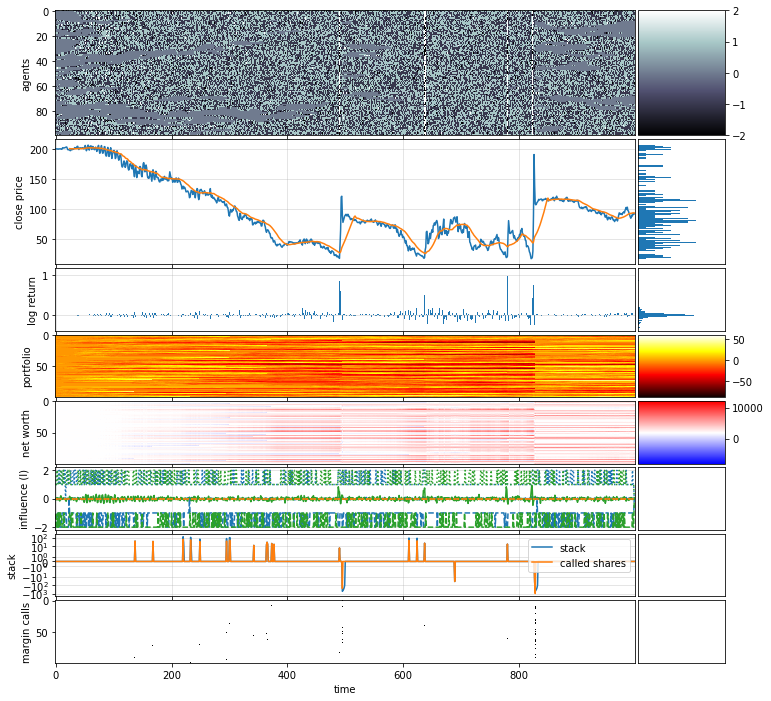

In [12]:
G,P,N,S,X,D,T,U,C, initial_account_balance = simulation(trigger = False, bound = True, pd = 0.05, pe = 0.01,
                    ph = 0.0485, pa = 0.3, N0 = 1000, N1 = 100, A = 1.8, a=2*1.8, h=1, 
                    pi1 = 0.1, pi2 = 0, pi3 = 0.9)
visualiseNICE(G, P, N, S, X, D, T, U, C)

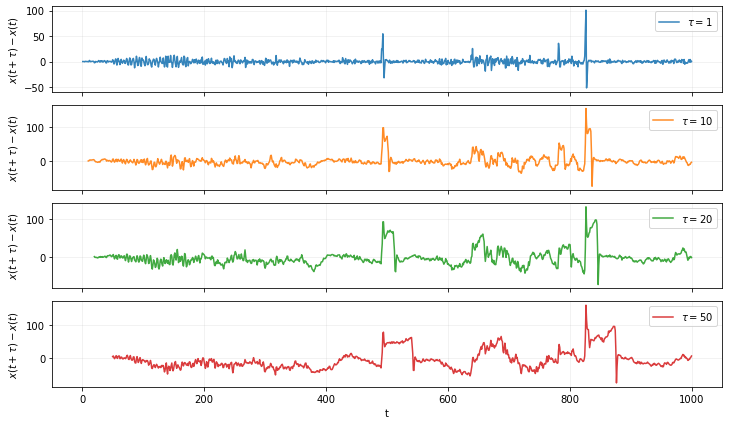

In [13]:
fig, axs = plt.subplots(
        ncols=1, nrows=4, figsize=(12,7), sharex=True, gridspec_kw = {'wspace':0, 'hspace':0.15})
        
axs = axs.ravel()

colours = ["C0", "C1", "C2", "C3"]

T_vals = [1,10,20,50]
t = np.arange(len(S))

for index,T in enumerate(T_vals):
    fluc = []
    for i in range(len(S)-T):
        fluc.append(S[i+T] - S[i])

    axs[index].plot(t[T:len(S)], fluc, alpha = 0.9, color=colours[index], label=r"$\tau = {{{}}}$".format(T_vals[index]))
    axs[index].grid(alpha=0.2)
    axs[index].set_ylabel(r"$x(t + \tau) - x(t)$")
    axs[index].legend()

fig.align_ylabels()
plt.xlabel(r"t")
plt.savefig("x_t_tau_2", dpi=300)
##plt.xlim(200, 500)
plt.show()


### Multifractal analysis

In [14]:
def fractal_latent_heat_alex(series, tau, N):
    splt = np.array_split(series, N)
    q_vals = np.linspace(-5, 5, 100)

    ## structs
    C_q = np.zeros(q_vals.shape[0] - 2) # Second derivative
    X_q = np.zeros(q_vals.shape[0])
    S_q = np.zeros(q_vals.shape[0] - 1) # First derivative
    mu_i = np.zeros(len(splt))
    denom_sum = 0

    ## eq 10
    for i in range(len(splt)):
        denom_sum += np.abs(splt[i][tau] - splt[i][0])

    for j in range(len(splt)):
        mu_i[j] = np.abs(splt[j][tau] - splt[j][0]) / denom_sum
        
    print(np.sum(mu_i))
        
    lhs = np.zeros((q_vals.shape[0]))
    rhs = np.zeros((q_vals.shape[0]))

    for k, val in enumerate(q_vals):
        ## eq 11
        lhs[k] = np.log(np.sum(mu_i**val))
        rhs[k] = np.log(N)
        ## solve for slope of log-log
        ## x_q equivelent to tau(q) in casenna
        X_q[k] = lhs[k] / rhs[k] # read: Chi_q

    # ## cannot obtain C_q for first and last q vals
    for l in range(1, q_vals.shape[0] - 1):
        C_q[l - 1] = X_q[l + 1] - 2 * X_q[l] + X_q[l - 1]
        S_q[l - 1] = X_q[l + 1] - X_q[l - 1]

    return q_vals, C_q, S_q, X_q

1.0


(-5.0, 5.0)

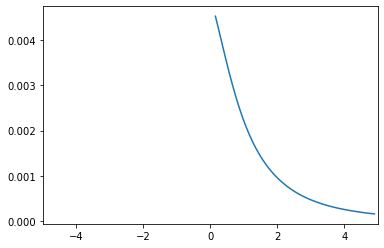

In [15]:
tau = 1
q_vals, C_q, S_q, X_q = fractal_latent_heat_alex(np.array(S), tau, 10)
plt.plot(q_vals[1:len(q_vals)-1], C_q)
plt.xlim([-5,5])

For some tau values, overflow happens in lhs[k], thus there can be Inf in the part corresponding to negative $q$.

## Additional complexity measures (not used in presentation)

### Eigenvalues of the correlation matrices
Complexity rises from nonlinearity. Since correlation matrix implies linearity, analyzing the eigenvalues of the correlation matrix at each time step might be helpful.

In [16]:
import seaborn as sns
from scipy import linalg

In [17]:
G_df = pd.DataFrame(G)

Extract two adjacent columns from the G matrix (two consecutive time steps).

Possible alternative: try two columns further apart?

In [19]:
def corr_eig(G):
    t = np.arange(len(G)-1)

    eig1 = []
    eig2 = []
    eig3 = []
    eig4 = []
    eig5 = []
    eig6 = []
    eig7 = []
    eig8 = []

    for i in range(len(G)-1):
        G_df_2col = G_df.iloc[i:i+2,:]
        corr_mat = G_df_2col.corr().fillna(0).to_numpy()
        eig = linalg.eigvals(corr_mat)
        eig1.append(eig[0])
        eig2.append(eig[1])
        eig3.append(eig[2])
        eig4.append(eig[3])
        eig5.append(eig[4])
        eig6.append(eig[5])
        eig7.append(eig[6])
        eig8.append(eig[7])

    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('t')
    ax1.set_ylabel('Eigenvalue', color=color)
    ax1.plot(t, np.array(eig4)**4, color=color, alpha=0.3) # The fourth eigenvalue
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_title('4th eigenvalue of the correlation matrix')

    ax2 = ax1.twinx()

    color = 'tab:orange'
    ax2.set_ylabel('Stock price', color=color)
    ax2.plot(t, S[1:len(S)], color=color, alpha=0.6)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()

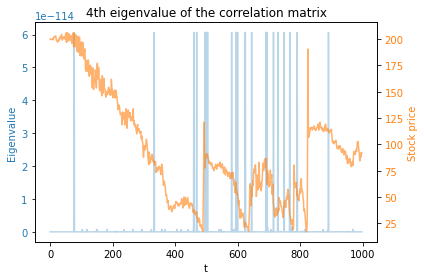

In [20]:
corr_eig(G)